<a href="https://colab.research.google.com/github/antoniodeepblue/Data-Mining/blob/main/huggingface_Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Esta Dataset son venntas al por mayor a los clientes de productos frescos:
Información de atributos:

1) FRESH:: gasto anual (m.u.) en productos frescos (Continuo);

2) MILK: gasto anual (m.u.) en productos lácteos (continuo);

3) GROCERY: gasto anual (m.u.) en productos comestibles (Continuo);

4) FROZEN: gasto anual (m.u.)en productos congelados (continuo)

 5) DETERGENTS_PAPER: gasto anual (m.u.) en detergentes y productos de papel (continuo)

6) DELICATESSEN: gasto anual (m.u.)
en productos delicatessen (Continuo);

7) CHANNELL: canal de clientes - Horeca (Hotel/Restaurante/Café©) o canal minorista (nominal)

8) REGIÓN: región de los clientes ™: ™ Lisnon, Oporto u otras estadísticas descriptivas (nominales):


In [ ]:
# lee el fichero .csv y lo devuelve como DataFrame
data = pd.read_csv('/content/drive/MyDrive/Ventas_clientes.csv')
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Con la info ya vemos que tiene 440 entradas y todas son **no nulas**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
# Hacemos un recorrido por todas las columnas para ver el porcentaje de valores vacios
for c in data.columns:
  print(f"-{c} has {round(data[c].isna().sum()*100/len(data), 2)} % Valores vacios.")

-Channel has 0.0 % Valores vacios.
-Region has 0.0 % Valores vacios.
-Fresh has 0.0 % Valores vacios.
-Milk has 0.0 % Valores vacios.
-Grocery has 0.0 % Valores vacios.
-Frozen has 0.0 % Valores vacios.
-Detergents_Paper has 0.0 % Valores vacios.
-Delicassen has 0.0 % Valores vacios.


CHANNEL : CANAL DEL CLIENTE, TIENE COMO VALOR 1 o 2.

In [ ]:
data['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [ ]:
# Channel - Canal del cliente
# Sus valores son
# 1 - Horeca (Hotel/Restaurant/Café)
# 2 - Retail channel (Nominal) (vendedor minorista)

REGION : TIENE  VALORES 1 o 2  o 3.

In [ ]:
data['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [ ]:
# Region - Región del cliente
# Sus valores son
# 1 - Lisboa
# 2 - Oporto
# 3 - Otras regiones

No tenemos un **target**, con lo cual sabemos que es un metodo no supervisado. Ahora debemos analizar como lo vamos agrupar.

La cuestion es ¿en cuantas clases o grupos agrupar?

La idea es agrupar por similitudes a los clientes, distintos tipos de clientes, basandome en los datos.

Y cuanto sera la cantidad de K? 2, 3, 4..


El **criterio** para seleccionar el valor de k, es sumas de la distancia entre cada grupo para cada valor de K. Es decir si por ejemplo tengo 7 variables, tengo que hacer K-means para K=1, 2, 3, 4, 5 ,6, 7.

Me quedo con el valor de K, donde no hay diferencia significativa entre un valor a otro, por eso se llama diagrama de codo (donde queda el codo).

Para porder crear el diagrama de codo, necesitamos apricar K_means, y para ello ,

el dataset no puede tener valores nulos,

ver si hay filas duplicadas,

variables categoricas si tiene y las transformamos,

verificar datos outliers (valores atipicos)

la estandarizacion finalmente y le aplicamos el Scaler


Todas las variables son integer, pero Channel y Region a pesar de ser integer, **son categoricas**.
sE DETECTA BAJO LOS DATOS QUE son ofrece el Dataset (la pagina donde he descargado el repositorio) y observando la descripcion de cada variable.

Ya que Channel es el canal de los clientes que puede ser 1 o 2 (categoricas):

1 = Hotel/Restaurante/Café

2 = Venta al por menor

Ya que Region ES CATEGORICA (1 , 2 O 3)

1 = LISBOA

2 = OPORTO

3 = OTRA REGION

Para ver si hay **duplicados**, y me da 0:

In [ ]:
# No se tienen filas duplicadas
data.duplicated().sum()

0

Separamos el dataSet entre categoricas y numericas.


In [ ]:
cols_categoricas = ['Channel', 'Region']

# dataframe con las variables categóricas
df_categoricas = data[cols_categoricas]

# dataframe con las variables numéricas
df_numericas = data.drop(columns=cols_categoricas)

Sobre el dataframe con las variables numericas (tengo 6 variable numericas),

que vamos a representar con un **diagrama de cajas**, para ver si distribucion

en cuanto a que valores ronda y si tiene valores atipicos(outliners)

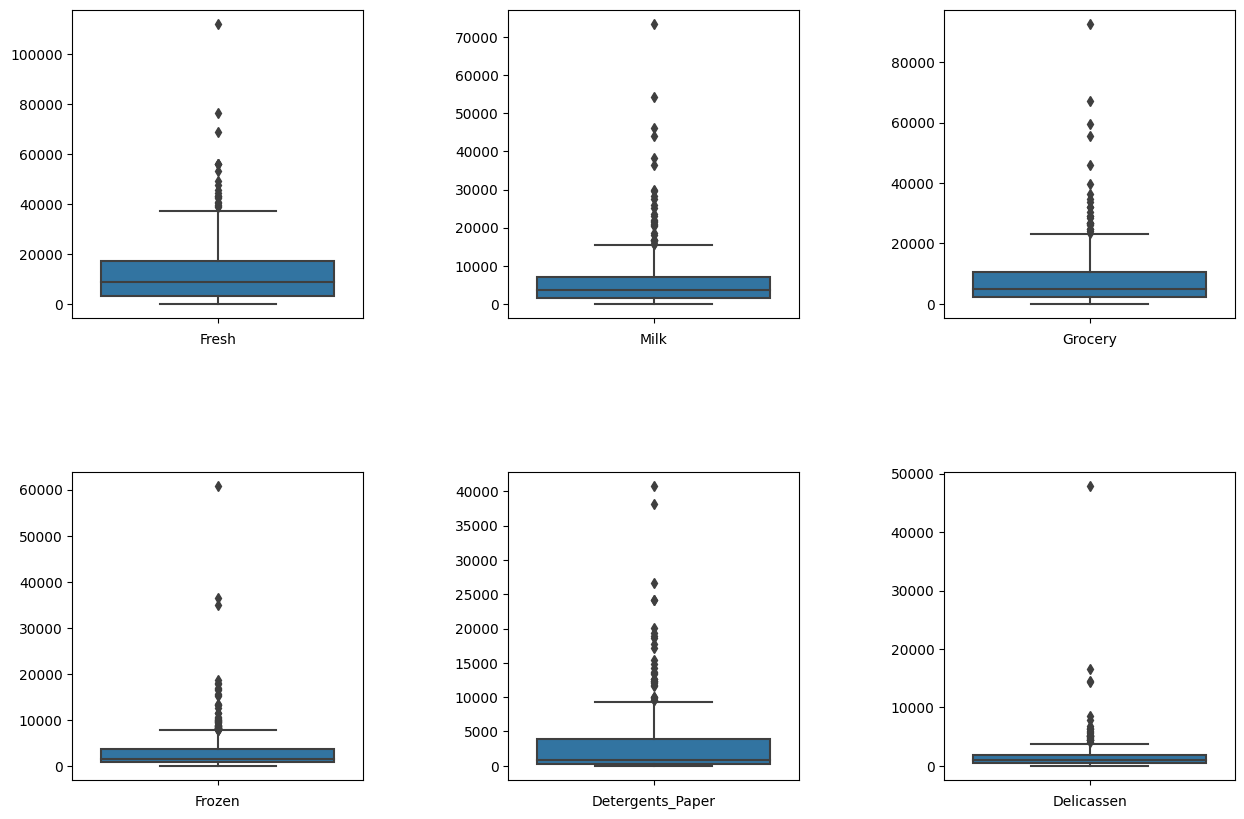

In [ ]:
nfilas = 2
ncols = 3
fig, ax = plt.subplots(nfilas, ncols, figsize=(15, 10))
# wspace - para controlar el espacio horizontal entre subplots
# hspace - para controlar el espaccio vertical entre subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(nfilas):
  for j in range(ncols):
    indice_col = ncols*i+j
    sns.boxplot(data=df_numericas.iloc[:, indice_col], ax=ax[i,j])
    ax[i,j].set_xlabel(df_numericas.columns[indice_col])
    ax[i,j].set_xticklabels([])
plt.show()

Vamos analizar  los diagramas de Cajas al detalle, sobre todo para identificar los outliners:

**Fresh:** Los outaliners estan bastante alejados tanto de la mediana como  de la concentracion de datos (causan ruido de 60.000 hacia arriba, debemos analizarlos, pero pueden ser clientes que hacen compras muy grandes)

**Milk:** Los outaliners estan bastante alejados tanto de la mediana como  de la concentracion de datos (causan ruido de 30.000 hacia arriba, debemos analizarlos, pero pueden ser clientes que hacen compras muy grandes)

**Grocery:** Los outaliners estan bastante alejados tanto de la mediana como  de la concentracion de datos (causan ruido de 40.000 hacia arriba, debemos analizarlos, pero pueden ser clientes que hacen compras muy grandes)

**Frozen:** Los outaliners estan bastante alejados tanto de la mediana como  de la concentracion de datos. Vemos que se acercan la mayoria de datos al cero. (causan ruido de 20.000 hacia arriba, debemos analizarlos, pero pueden ser clientes que hacen compras muy grandes)

**Detergents_Paper:** Los outaliners estan bastante alejados tanto de la mediana  como de la concentracion de datos. Vemos que se acercan la mayoria de datos al cero. (causan ruido de 20.000 hacia arriba, debemos analizarlos,pero pueden ser clientes que hacen compras muy grandes)

**Delicasse:** Los outaliners estan bastante alejados tanto de la mediana  como de la concentracion de datos.Vemos que se acercan la mayoria de datos al cero.  (causan ruido de 10.000 hacia arriba, debemos analizarlos, pero pueden ser clientes que hacen compras muy grandes)

**Conclusion:** Los valores atipicos que representan estos diagramas de Cajas, demuestra que tienes valores atipicos de compras grandes de clientes potenciales, pero que no son errores. No existe ningun valor por debajo de cero, es evidente pues no pueden existen compras negativas.
De acuerdo el conjunto de datos, los outliners son clientes premium (mayoritas) y no debemos eliminar esa información.
Es complicado decir que existen errores poque no sabemos cuantos mayoristas tenemos, entonces será complicado que el algoritmo sea muy exacto.
También podemos estandarizar los datos atipicos.
O por ejemplo hacer una media hacemos una media teniendo en cuento la densidad de la población.
También podemos ver el rango en el que se mueven las ventas.

Vemos que el cliente numero 181 es un mayorista, porque vemos que tiene compras grandes de Fresh, Milk

In [ ]:
# Vemos que tenemos 1 fila que es superior a 80000
df_numericas[df_numericas['Fresh'] > 80000]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
181,112151,29627,18148,16745,4948,8550


In [ ]:
# Vemos que tenemos 1 fila que es superior a 20000
df_numericas[df_numericas['Milk'] > 20000]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,26373,36423,22019,5154,4337,16523
28,4113,20484,25957,1158,8604,5206
45,5181,22044,21531,1740,7353,4985
47,44466,54259,55571,7782,24171,6465
49,4967,21412,28921,1798,13583,1163
56,4098,29892,26866,2616,17740,1340
61,35942,38369,59598,3254,26701,2017
65,85,20959,45828,36,24231,1423
85,16117,46197,92780,1026,40827,2944
86,22925,73498,32114,987,20070,903


In [ ]:
# Vemos que tenemos 1 fila que es superior a 10000
df_numericas[df_numericas['Delicassen'] > 10000]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,26373,36423,22019,5154,4337,16523
71,18291,1266,21042,5373,4173,14472
87,43265,5025,8117,6312,1579,14351
183,36847,43950,20170,36534,239,47943


In [ ]:
# Vemos que tenemos 1 fila que es superior a 30000
df_numericas[df_numericas['Frozen'] > 30000]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
93,11314,3090,2062,35009,71,2698
183,36847,43950,20170,36534,239,47943
325,32717,16784,13626,60869,1272,5609


Clientes 23, 181, 183 se repite en varias variables como outliners, que es claro que son mayoriscas que hacen grandes compras, con lo cual no son errores. Asi podriamos analizar todas las variables para determinar que son outliners. Entonces a priori no hay que eliminar ningun dato.

Contabilizamos los valores atipicos, por ejemplo, de Fresh y salen 19 outliners

y gran porcentaje con respecto a las 440 ejemplos que tenemos.

Es cierto que el algoritmo no va a ser muy exacto, ya que tiene muchos datos outliners

In [ ]:
# Ejemplo de análisis de un outlier relacionado con la variable Fresh
# 19 valores por encima de 39000
len(df_numericas[df_numericas['Fresh'] > 39000])

19

Ejemplo en el caso de que quisiera **eliminar Outliners**, pu sería asignar a una variable, o la misma, los valores por debajo de un limite, evidentemente abremos eliminado todos lo que estasn por encima

In [ ]:
# Vemos que tenemos 3 fila ques es superior a 60000
df_numericas[df_numericas['Fresh'] > 60000]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
125,76237,3473,7102,16538,778,918
181,112151,29627,18148,16745,4948,8550
284,68951,4411,12609,8692,751,2406


In [ ]:
# Vemos que tenemos 440 - 3 = 437 filas que es inferior a 60000
df_numericas2 = df_numericas[df_numericas['Fresh'] < 60000]
df_numericas2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


**Continuamos con el analisis**, dejando de lado la opcion de que eliminaramos Outliners

In [ ]:
# importamos la libreria matplotlib
import matplotlib.pyplot as plt

# Libreria creada sobre matplotlib. Proporciona una interfaz de alto nivel
# para crear gráficos estadísticos con pocas líneas de codigo
import seaborn as sns

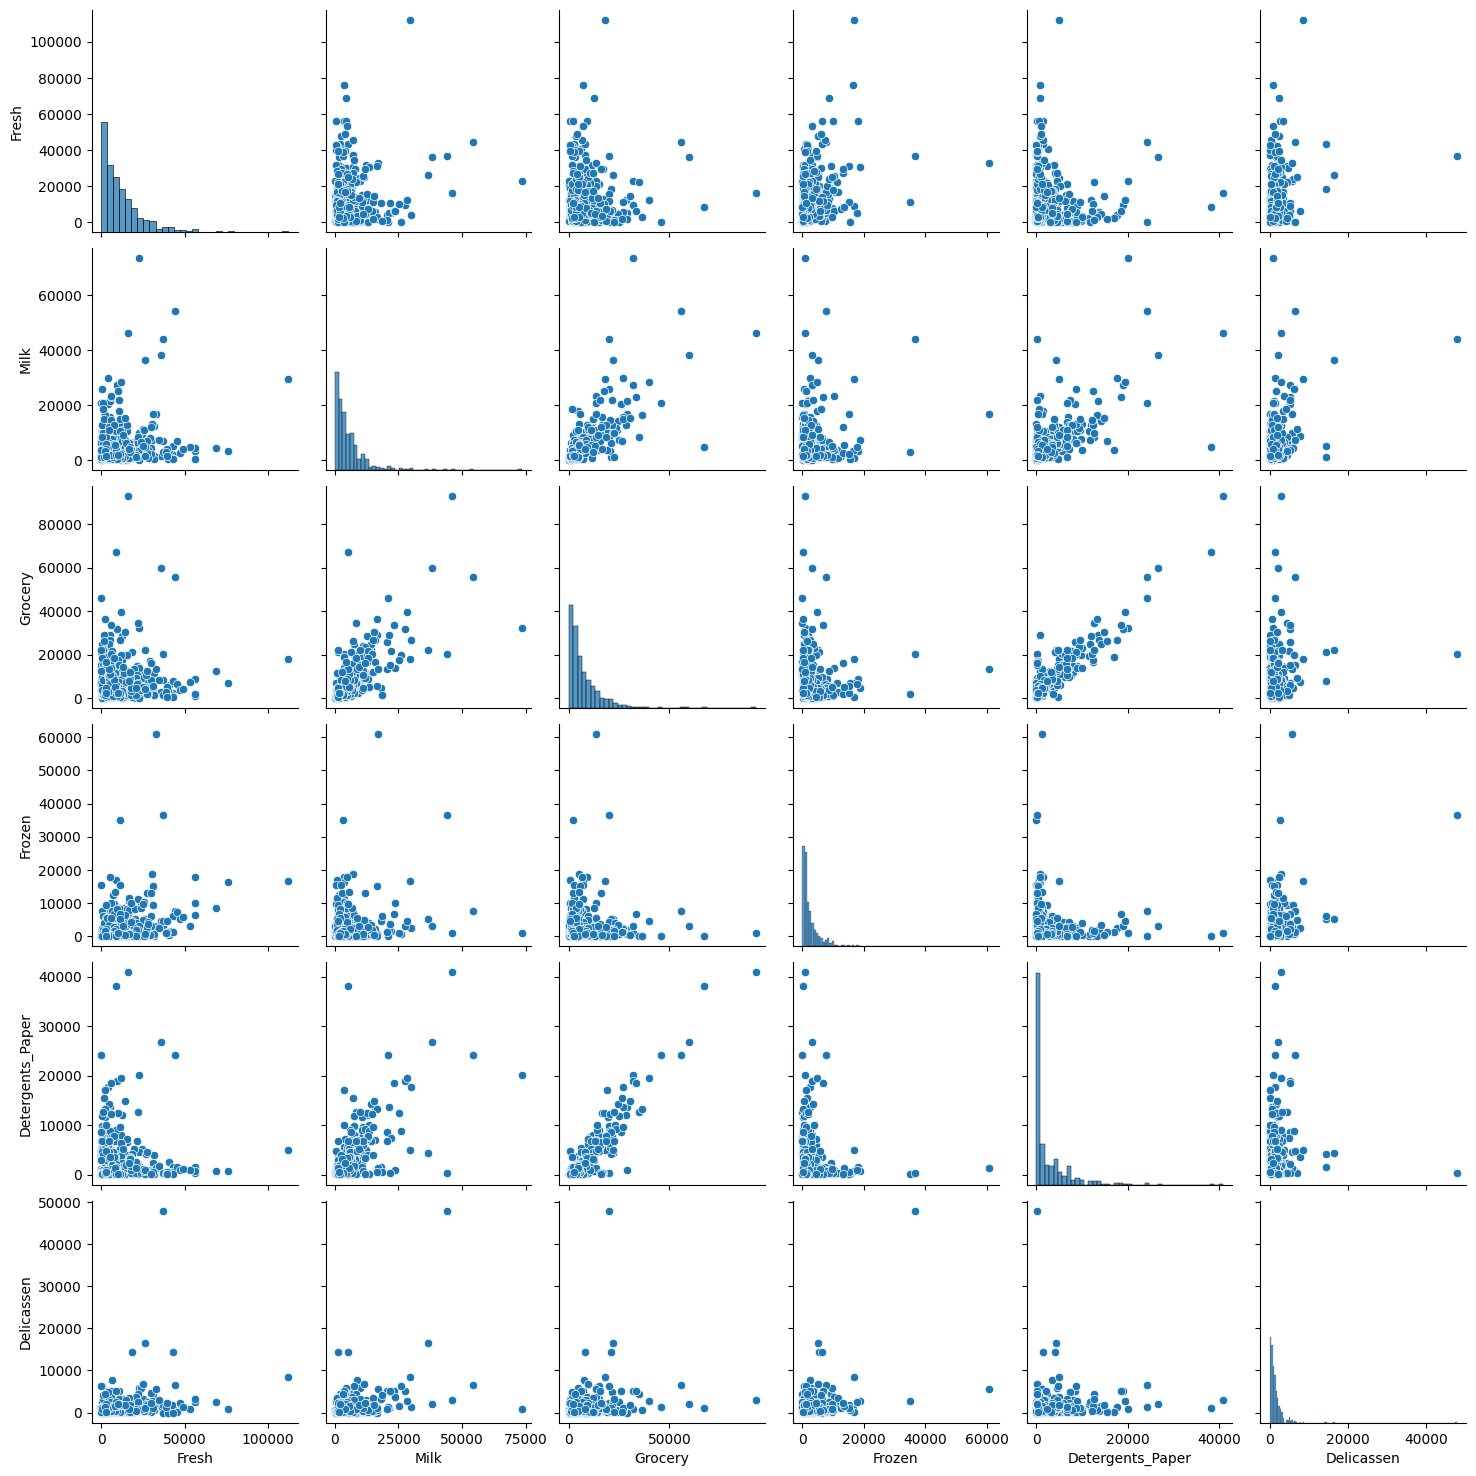

In [ ]:
# Visualizamos el diagrama de dispersion solo con las numericas
sns.pairplot(df_numericas)

**TRANSFORMACION DE VARIABLES CATEGORICAS A NUMERICAS**.
Anteriormente ya definimos:

cols_categoricas = ['Channel', 'Region']

**dataframe con las variables categóricas**

df_categoricas = data[cols_categoricas]

**dataframe con las variables numéricas**

df_numericas = data.drop(columns=cols_categoricas)

In [ ]:
cols_categoricas = ['Channel', 'Region']

# dataframe con las variables categóricas
df_categoricas = data[cols_categoricas]

# dataframe con las variables numéricas
df_numericas = data.drop(columns=cols_categoricas)

In [ ]:
# Transformar las variables categóricas en númericas
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

# hacer OneHotEncoder por cada columna categórica
for col in cols_categoricas:
  # transformar la columna aplicando el OneHotEncoder
  transformed = enc.fit_transform(df_categoricas[col].to_numpy().reshape(-1, 1))
  # crear los nombres de las nuevas columnas a partir del nombre de la columna original (col)
  column_names = [col + str(i+1) for i in range(len(df_categoricas[col].value_counts()))]
  # convertir a Dataframe
  enc_data = pd.DataFrame(transformed.toarray(), columns=column_names)

  # agregar las nuevas columnas codificadas al datset numérico
  df_numericas = df_numericas.join(enc_data)

Como Channel tiene 2 valores, pues obtenemos 2 variables.
Como Region tiene 3 valores, obtenemos 3 variables.

In [ ]:
# Nos fijamos que en la transformacion, de cada variable que se creo numerica,
# por ejemplo Channel1, para cada ejemplo será 1 si pertenece 0 = si no pertenece.
df_numericas.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel1,Channel2,Region1,Region2,Region3
0,12669,9656,7561,214,2674,1338,0.0,1.0,0.0,0.0,1.0
1,7057,9810,9568,1762,3293,1776,0.0,1.0,0.0,0.0,1.0
2,6353,8808,7684,2405,3516,7844,0.0,1.0,0.0,0.0,1.0
3,13265,1196,4221,6404,507,1788,1.0,0.0,0.0,0.0,1.0
4,22615,5410,7198,3915,1777,5185,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Me sale un array tipo numpy, ya estandariazamos, yo no necesito que sea tito DATAframe
df_numericas

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel1,Channel2,Region1,Region2,Region3
0,12669,9656,7561,214,2674,1338,0.0,1.0,0.0,0.0,1.0
1,7057,9810,9568,1762,3293,1776,0.0,1.0,0.0,0.0,1.0
2,6353,8808,7684,2405,3516,7844,0.0,1.0,0.0,0.0,1.0
3,13265,1196,4221,6404,507,1788,1.0,0.0,0.0,0.0,1.0
4,22615,5410,7198,3915,1777,5185,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1.0,0.0,0.0,0.0,1.0
436,39228,1431,764,4510,93,2346,1.0,0.0,0.0,0.0,1.0
437,14531,15488,30243,437,14841,1867,0.0,1.0,0.0,0.0,1.0
438,10290,1981,2232,1038,168,2125,1.0,0.0,0.0,0.0,1.0


In [ ]:
type(df_numericas)

pandas.core.frame.DataFrame

In [ ]:
# Normalizar los datos, y se lo asignamos a la variable X (la matriz sobre la que vamos a trabajar)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_numericas.values)

In [ ]:
# en n guardo la cantidad de variables
n = len(df_numericas.columns)
n

11

**Aplicación del algoritmo Kmeans**

In [ ]:
from sklearn.cluster import KMeans

Queremos calcular para cada K, en este caso tenemos 11 cluster que pueden ser hasta un maximo de 11 que son las variables que tenemos.
Entonces hemos aplicado Kmeans para calcular el K optimo, que lo deducimos a traves de el cuadrado de las distancias y de las siluetas.

In [ ]:
suma_cuadrados = []

for k in range(1, n+1):
  km = KMeans(n_clusters=k, n_init='auto').fit(X)

  # Agregar la suma de los cuadrados de las distancias de cada ejemplo
  # a su centroide más cercano
  suma_cuadrados.append(km.inertia_)

In [ ]:
# Obtenemos 11 valores, desde K= 1 hasta K =11, en nuestro caso
suma_cuadrados

[4839.999999999996,
 4022.1377097423165,
 3154.458417670893,
 2488.405538208557,
 2135.4745012155267,
 1918.684425316204,
 1524.268898833453,
 1363.196088352584,
 1241.8207735323012,
 1135.2475098616726,
 1009.0626578662367]

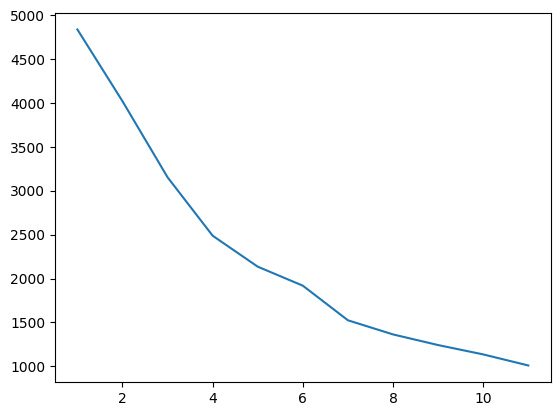

In [ ]:
# Obtenemos en el eje X con el valor range, y en el eje y el valor de la suma
# de los cuadrados de las distancias al centroide más cercano.
# linea por defecto
plt.plot(range(1, n+1), suma_cuadrados)

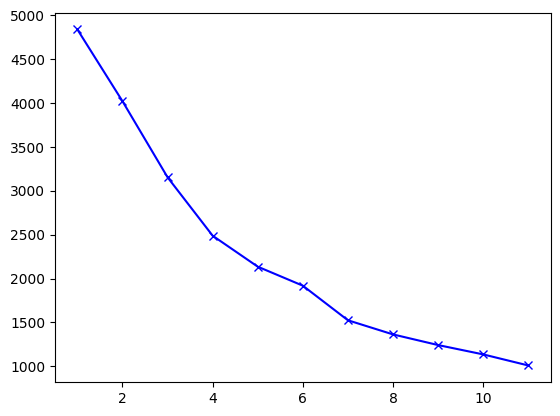

In [ ]:
# Obtenemos en el eje X con el valor range, y en el eje y el valor de la suma
# de los cuadrados de las distancias al centroide más cercano.
# 'bx-' es para marcar con una rallita el corte en la linea, para mejor visualización
plt.plot(range(1, n+1), suma_cuadrados, 'bx-')
plt.show()

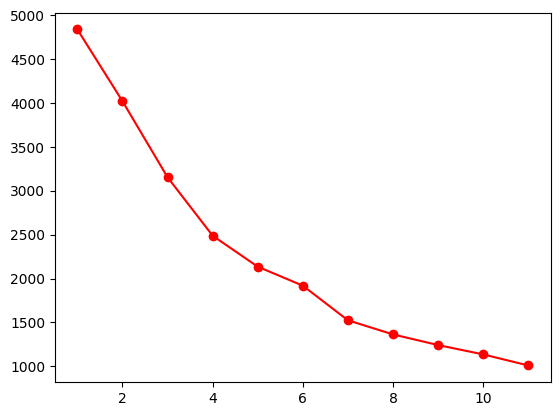

In [ ]:
# Obtenemos en el eje X con el valor range, y en el eje y el valor de la suma
# de los cuadrados de las distancias al centroide más cercano.
# 'ro-' es para marcar con un circulo el corte en la linea, para mejor visualización y r color rojo
plt.plot(range(1, n+1), suma_cuadrados, 'ro-')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
suma_cuadrados = []
coeff_silueta = []

for k in range(1, n+1):
  km = KMeans(n_clusters=k, n_init='auto').fit(X)

  # Agregar la suma de los cuadrados de las distancias de cada ejemplo
  # a su centroide más cercano
  suma_cuadrados.append(km.inertia_)
  if k > 1:
    coeff_silueta.append(silhouette_score(X, km.labels_))

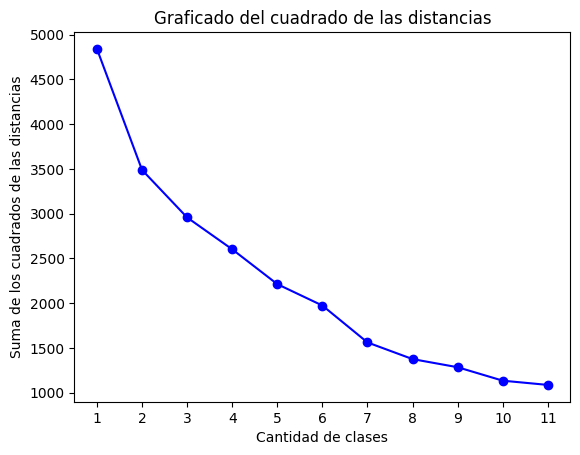

In [ ]:
x = list(range(1, n+1))
plt.plot(x, suma_cuadrados, 'bo-')
plt.xlabel('Cantidad de clases')
plt.ylabel('Suma de los cuadrados de las distancias')
plt.xticks(x)
plt.title("Graficado del cuadrado de las distancias")
plt.show()

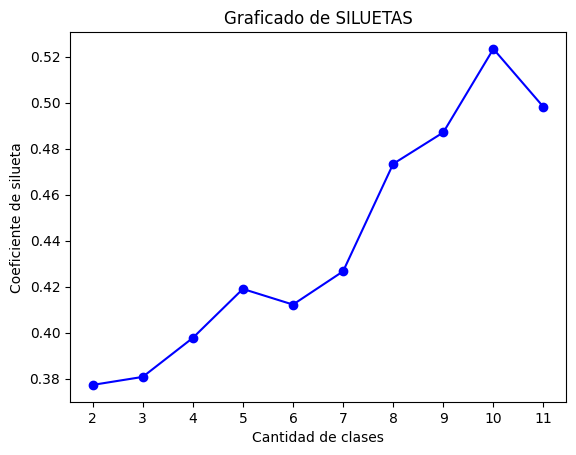

In [ ]:
# eN ESTE CASO ES N-1 PORQUE TIENEQUE SER COO MINIMO HAY QUE EMPEZAR CON 2 GRUPOS.
plt.plot(x[1:], coeff_silueta, 'bo-')
plt.xlabel('Cantidad de clases')
plt.ylabel('Coeficiente de silueta')
plt.xticks(x[1:])
plt.title("Graficado de SILUETAS")
plt.show()

Observando el grafico de siluetas que da el nivel de solapamiento entre grupos, y con 7 grupos esta bastante bien. Analizando el grafico de siluetas y el de la suma de las cuadrados de las distancias, el resultado sería con **k = 7 clusters**.

Los outliners suelen influir bastante en el graficado deL COEFICIENTE DE SILUETAS, porque mide el nivel de solapamiento entre 2 grupos distintos y nos dara una represantacion compleja.

In [ ]:
cols_categoricas = ['Channel', 'Region']

# dataframe con las variables categóricas
df_categoricas = data[cols_categoricas]

# dataframe con las variables numéricas
df_numericas = data.drop(columns=cols_categoricas)

Aqui vemos el boxt plot original, de nuevo.

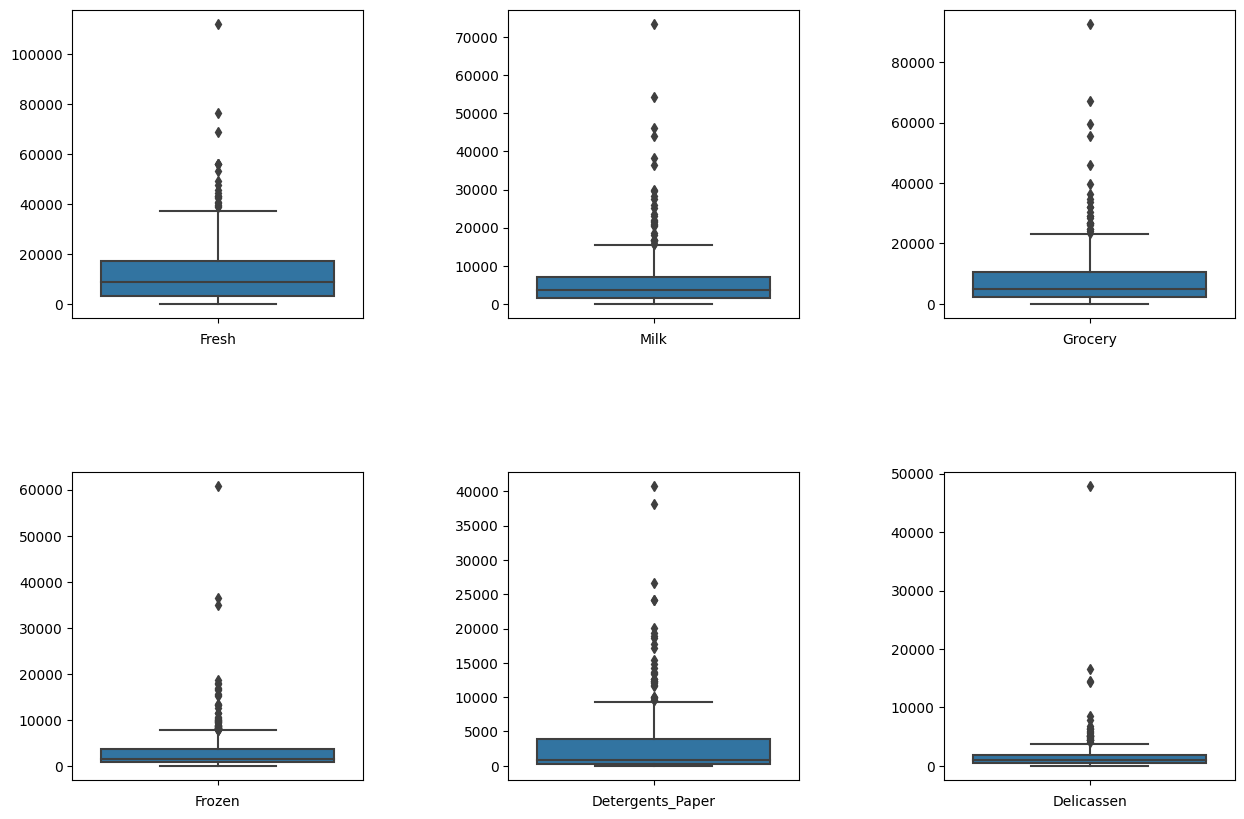

In [ ]:
nfilas = 2
ncols = 3
fig, ax = plt.subplots(nfilas, ncols, figsize=(15, 10))
# wspace - para controlar el espacio horizontal entre subplots
# hspace - para controlar el espaccio vertical entre subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(nfilas):
  for j in range(ncols):
    indice_col = ncols*i+j
    sns.boxplot(data=df_numericas.iloc[:, indice_col], ax=ax[i,j])
    ax[i,j].set_xlabel(df_numericas.columns[indice_col])
    ax[i,j].set_xticklabels([])
plt.show()

In [ ]:
# Eliminando las filas con las ventas de alimentos frescos (Fresh) > 33000

df_numericas.drop(df_numericas[df_numericas['Fresh'] >= 33000].index, inplace = True)
df_numericas = df_numericas.reset_index(drop=True)

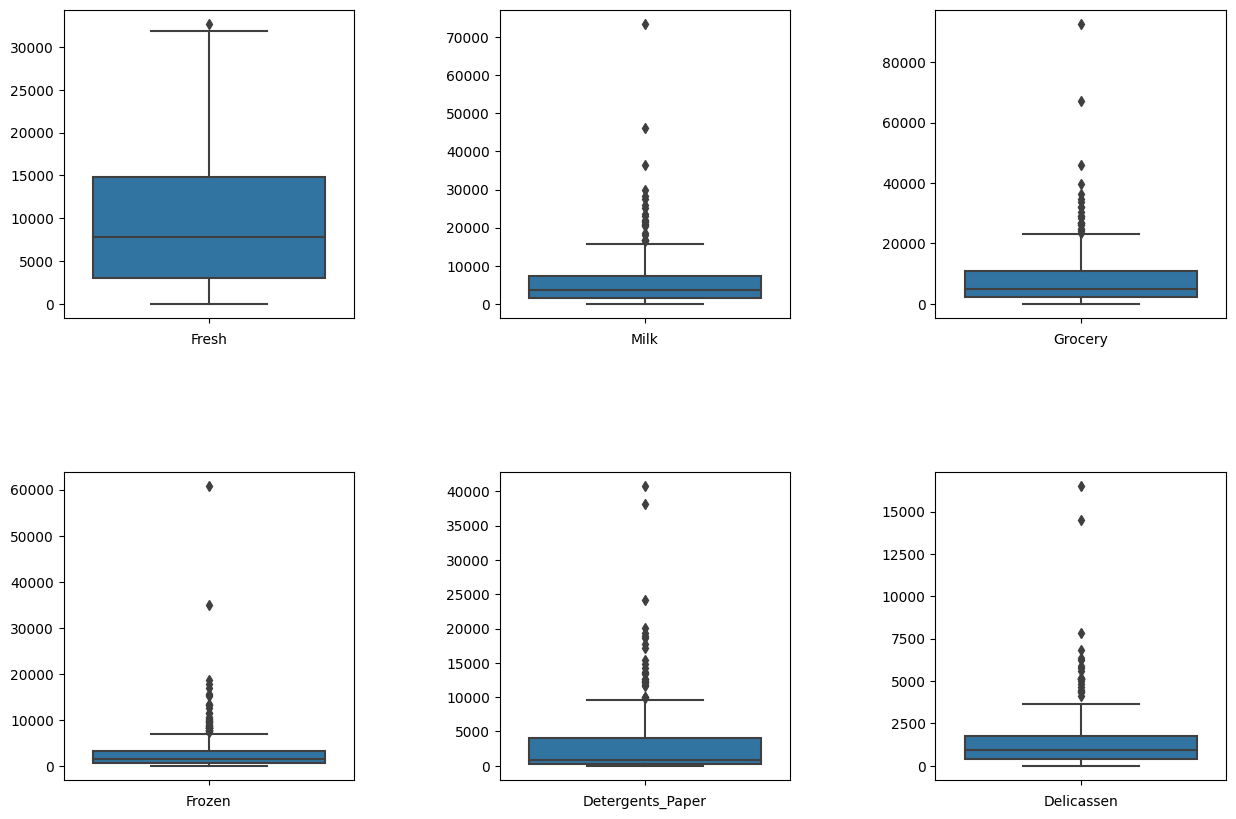

In [ ]:
nfilas = 2
ncols = 3
fig, ax = plt.subplots(nfilas, ncols, figsize=(15, 10))
# wspace - para controlar el espacio horizontal entre subplots
# hspace - para controlar el espaccio vertical entre subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(nfilas):
  for j in range(ncols):
    indice_col = ncols*i+j
    sns.boxplot(data=df_numericas.iloc[:, indice_col], ax=ax[i,j])
    ax[i,j].set_xlabel(df_numericas.columns[indice_col])
    ax[i,j].set_xticklabels([])
plt.show()

In [ ]:
# Transformar las variables categóricas en númericas
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

# hacer OneHotEncoder por cada columna categórica
for col in cols_categoricas:
  # transformar la columna aplicando el OneHotEncoder
  transformed = enc.fit_transform(df_categoricas[col].to_numpy().reshape(-1, 1))
  # crear los nombres de las nuevas columnas a partir del nombre de la columna original (col)
  column_names = [col + str(i+1) for i in range(len(df_categoricas[col].value_counts()))]
  # convertir a Dataframe
  enc_data = pd.DataFrame(transformed.toarray(), columns=column_names)

  # agregar las nuevas columnas codificadas al datset numérico
  df_numericas = df_numericas.join(enc_data)

In [ ]:
# Normalizar los datos, y se lo asignamos a la variable X (la matriz sobre la que vamos a trabajar)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_numericas.values)
X

array([[ 0.36315989,  0.61459179, -0.02919653, ..., -0.47800277,
        -0.35786226,  0.65390076],
       [-0.32978396,  0.63779013,  0.19225087, ..., -0.47800277,
        -0.35786226,  0.65390076],
       [-0.41671063,  0.48685031, -0.01562502, ..., -0.47800277,
        -0.35786226,  0.65390076],
       ...,
       [ 0.59307106,  1.49311578,  2.47347908, ..., -0.47800277,
        -0.35786226,  0.65390076],
       [ 0.06941196, -0.54155903, -0.61718517, ..., -0.47800277,
        -0.35786226,  0.65390076],
       [-0.85702385, -0.58418973, -0.58651134, ..., -0.47800277,
        -0.35786226,  0.65390076]])

In [ ]:
# en n guardo la cantidad de variables
n = len(df_numericas.columns)
n

11

In [ ]:
df_numericas

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel1,Channel2,Region1,Region2,Region3
0,12669,9656,7561,214,2674,1338,0.0,1.0,0.0,0.0,1.0
1,7057,9810,9568,1762,3293,1776,0.0,1.0,0.0,0.0,1.0
2,6353,8808,7684,2405,3516,7844,0.0,1.0,0.0,0.0,1.0
3,13265,1196,4221,6404,507,1788,1.0,0.0,0.0,0.0,1.0
4,22615,5410,7198,3915,1777,5185,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
409,16731,3922,7994,688,2371,838,1.0,0.0,0.0,0.0,1.0
410,29703,12051,16027,13135,182,2204,1.0,0.0,0.0,0.0,1.0
411,14531,15488,30243,437,14841,1867,1.0,0.0,0.0,0.0,1.0
412,10290,1981,2232,1038,168,2125,1.0,0.0,0.0,0.0,1.0


En este caso, heplos eliminado Outliners, y el graficado nos muestra con el cuadrado de las distancias seria el 6 y 8, y para el coeficiente de silueta seria el el 8 y 6. Con lo cual el numero elegido seria el 8

In [ ]:
# el número de clases elegido 8 debido ...
km = KMeans(n_clusters=8, n_init='auto').fit(X)

In [ ]:
# Normalizar los datos, y se lo asignamos a la variable X (la matriz sobre la que vamos a trabajar)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_numericas.values)
X

array([[ 0.36315989,  0.61459179, -0.02919653, ..., -0.47800277,
        -0.35786226,  0.65390076],
       [-0.32978396,  0.63779013,  0.19225087, ..., -0.47800277,
        -0.35786226,  0.65390076],
       [-0.41671063,  0.48685031, -0.01562502, ..., -0.47800277,
        -0.35786226,  0.65390076],
       ...,
       [ 0.59307106,  1.49311578,  2.47347908, ..., -0.47800277,
        -0.35786226,  0.65390076],
       [ 0.06941196, -0.54155903, -0.61718517, ..., -0.47800277,
        -0.35786226,  0.65390076],
       [-0.85702385, -0.58418973, -0.58651134, ..., -0.47800277,
        -0.35786226,  0.65390076]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# el número de clases elegido 4 debido para hacer el despliegue
kmprueba = KMeans(n_clusters=4, n_init='auto').fit(X)
kmprueba

KMeans(n_clusters=4, n_init='auto')

In [ ]:
X

array([[ 0.36315989,  0.61459179, -0.02919653, ..., -0.47800277,
        -0.35786226,  0.65390076],
       [-0.32978396,  0.63779013,  0.19225087, ..., -0.47800277,
        -0.35786226,  0.65390076],
       [-0.41671063,  0.48685031, -0.01562502, ..., -0.47800277,
        -0.35786226,  0.65390076],
       ...,
       [ 0.59307106,  1.49311578,  2.47347908, ..., -0.47800277,
        -0.35786226,  0.65390076],
       [ 0.06941196, -0.54155903, -0.61718517, ..., -0.47800277,
        -0.35786226,  0.65390076],
       [-0.85702385, -0.58418973, -0.58651134, ..., -0.47800277,
        -0.35786226,  0.65390076]])

Guardar el modelo:

In [ ]:
import pickle

# Creamos el fichero del modelo, donde se va guardar el modelo
fichero = open('prueba.pkl','wb')
# Guardar el modelo
pickle.dump(kmprueba, fichero)
print(fichero)
fichero.close()

<_io.BufferedWriter name='prueba.pkl'>


In [ ]:
# Se abre fichero para lectura
fichero2 = open('prueba.pkl','rb')

# Cargamos los datos del fichero
lista_fichero = pickle.load(fichero2)
print(lista_fichero)

fichero.close()

KMeans(n_clusters=4, n_init='auto')


En el archivo **prueba.pkl** esta nuestro modelo k-means y lo guardamos en el archivo kmprueba. Posteriormente instalamos gradio.

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
import numpy as np
import gradio as gr
from sklearn.neighbors import KNeighborsClassifier



def modelo(Fresk, Milk, Grocery, Frozen, Detergents_Paper,Delicassen,Channel1,Channel2,Region1,Region2,Region3):
    species = ['0', '1', '2','3']
    i = kmprueba.predict([[Fresk, Milk, Grocery, Frozen,Detergents_Paper,Delicassen,Channel1,Channel2,Region1,Region2,Region3]])[0]
    return species[i]

interfaz = gr.Interface(
    fn=modelo,
    inputs=[
        gr.Slider(label='Fresk', minimum=0.0, maximum=8.0, step=0.1),
        gr.Slider(label='Milk', minimum=0.0, maximum=8.0, step=0.1),
        gr.Slider(label='Grocery', minimum=0.0, maximum=8.0, step=0.1),
        gr.Slider(label='Frozen', minimum=0.0, maximum=8.0, step=0.1),
        gr.Slider(label='Detergents_Paper', minimum=0.0, maximum=8.0, step=0.1),
        gr.Slider(label='Delicassen', minimum=0.0, maximum=8.0, step=0.1),
        gr.Slider(label='Channel1', minimum=0.0, maximum=8.0, step=0.1),
        gr.Slider(label='Channel2', minimum=0.0, maximum=8.0, step=0.1),
        gr.Slider(label='Region1', minimum=0.0, maximum=8.0, step=0.1),
        gr.Slider(label='Region2', minimum=0.0, maximum=8.0, step=0.1),
        gr.Slider(label='Region3', minimum=0.0, maximum=8.0, step=0.1),
    ],
    outputs=gr.Textbox(label='Kmeans Grupo:'),
    title='Ventas de productos',
    description='Este modelo está desarrollado para la agrupacion Kmeans de productos.',
    article='Antonio Fernandez Salcedo, Practicas Saturdays.AI. Aplicación desarrollada con fines docentes',
    theme='peach'

)

interfaz.launch()

/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:492: UserWarning: Cannot load peach. Caught Exception: The space peach does not exist
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://26d203f5bf49bb5a5a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
# Importa el módulo pickle, que es una biblioteca de Python para la serialización y deserialización de objetos.
import pickle

In [ ]:
# Ejecuta el comando !pwd, que imprime el directorio actual de trabajo en el entorno de Google Colab.
#El resultado se mostrará en la salida de la celda.
! pwd

/content


In [ ]:
# Abre un archivo llamado modeloprueba.pkl en modo de escritura binaria ('wb'). Este archivo se utilizará para almacenar
# un objeto serializado. Utiliza pickle.dump para serializar y guardar el objeto knn en el archivo modeloprueba.pkl.
# kmprueba es como hemos llamado al modelo entrenado (por ejemplo, un clasificador k-means).

with open('modeloprueba.pkl', 'wb') as file:
  pickle.dump(kmprueba, file)

In [ ]:
#df_numericas['CLASE'] = kmprueba.labels_
#df_numericas

In [ ]:
#kmprueba.labels_